In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")

In [33]:
from google.colab import files
data_to_load = files.upload()

Saving heart.csv to heart (3).csv


In [34]:
# Loading the data and viewing first few records
df=pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPain,RestingBP,Cholesterol,FastingBS,RestinggECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,1,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0


In [6]:
# Provides shape of the dataframe
df.shape

(918, 12)

In [7]:
#Provides overall information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPain       918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestinggECG     918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [8]:
#Provide statistics of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
Sex,918.0,0.210240,0.407701,0.0,0.00,0.0,0.0,1.0
ChestPain,918.0,1.452070,0.851832,0.0,1.00,2.0,2.0,3.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
RestinggECG,918.0,0.604575,0.805827,0.0,0.00,0.0,1.0,2.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
ExerciseAngina,918.0,0.404139,0.490992,0.0,0.00,0.0,1.0,1.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2


In [9]:
#Verify the null counts in the dataset
null_counts = df.isnull().sum()
print(null_counts)

Age               0
Sex               0
ChestPain         0
RestingBP         0
Cholesterol       0
FastingBS         0
RestinggECG       0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [10]:
# Count the number of unique values excluding NAN
df.nunique()

Age                50
Sex                 2
ChestPain           4
RestingBP          67
Cholesterol       222
FastingBS           2
RestinggECG         3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [11]:
# Drop duplicates if there are any
df.drop_duplicates(keep="first",inplace=True)

In [12]:
df.shape

(918, 12)

In [13]:
count_0 = (df['HeartDisease'] == 0).sum()
print(count_0)

410


In [14]:
count_1 = (df['HeartDisease'] == 1).sum()
print(count_1)

508


In [15]:
df.head()

,Age,Sex,ChestPain,RestingBP,Cholesterol,FastingBS,RestinggECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,1,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0


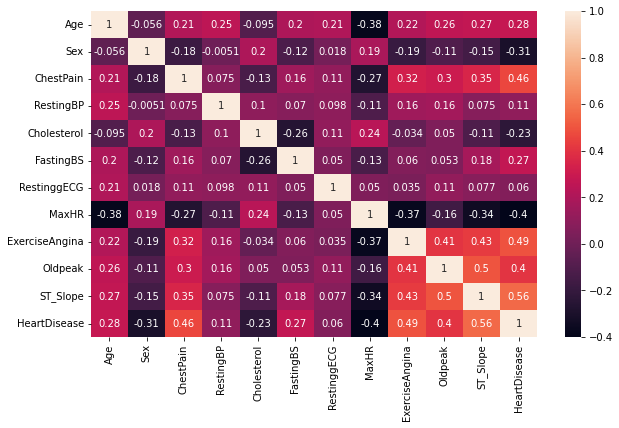

In [16]:
#Compute correlation between columns and visualisation in heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [17]:
corr = df.corrwith(df['HeartDisease']).sort_values(ascending = False).to_frame()
print(corr)

                       0
HeartDisease    1.000000
ST_Slope        0.558771
ExerciseAngina  0.494282
ChestPain       0.459017
Oldpeak         0.403951
Age             0.282039
FastingBS       0.267291
RestingBP       0.107589
RestinggECG     0.059516
Cholesterol    -0.232741
Sex            -0.305445
MaxHR          -0.400421


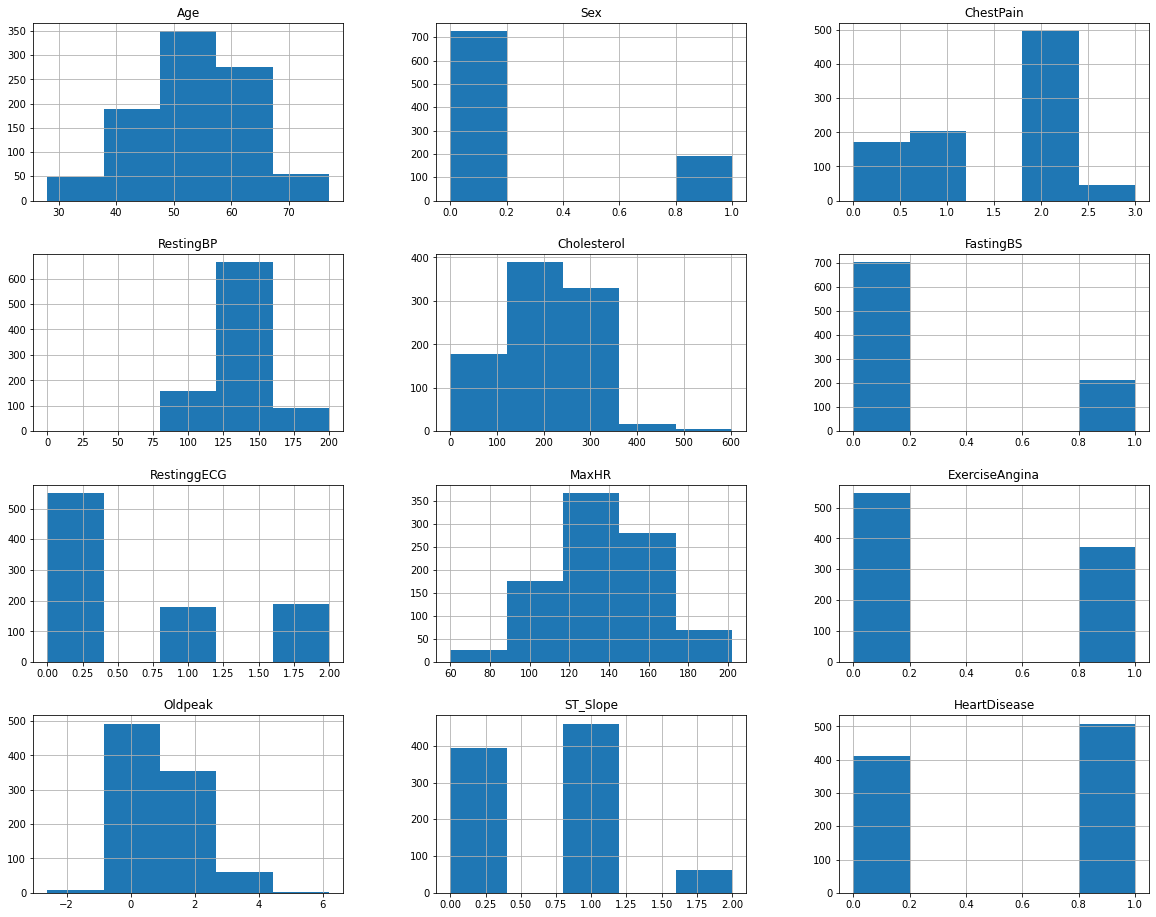

In [18]:
#View the distribution of data using histogram
df.hist(figsize=(20,16),bins=5)
plt.show()

In [19]:
#Numerical columns
numerical_data=df.select_dtypes(include=np.number).columns
numerical_data

Index(['Age', 'Sex', 'ChestPain', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestinggECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [20]:
#Categorical Columns
categorical_cols=df.select_dtypes('object').columns
categorical_cols

Index([], dtype='object')

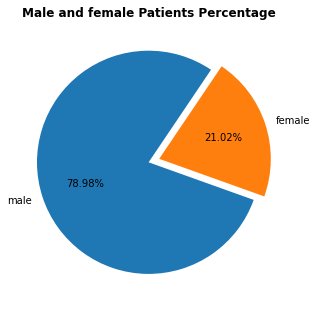

In [21]:
#Visualising percentage of male and female patients in the dataset
plt.figure(figsize=(5,7))
plt.title("Male and female Patients Percentage",fontweight="bold")
values = df["Sex"].value_counts()
plt.pie(values, labels=["male","female"], explode=(0,0.1), autopct="%.2f%%", startangle=56)
plt.show()

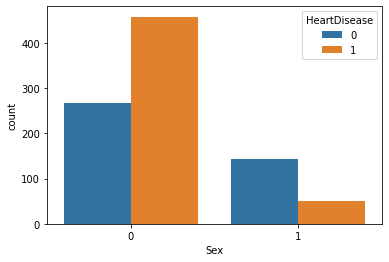

ValueError: ignored

In [22]:
sns.countplot(data=df,x="Sex",hue="HeartDisease")
plt.show()
sns.countplot(data=df,x="ChestPainType",hue="HeartDisease")
plt.show()

In [23]:
sns.countplot(data=df,x="ChestPainType",hue="HeartDisease")
plt.show()

ValueError: ignored

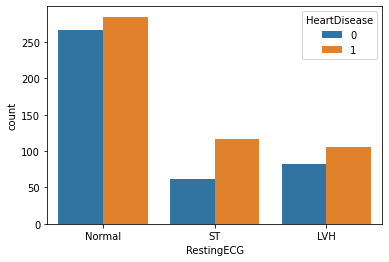

In [ ]:
sns.countplot(data=df,x="RestingECG",hue="HeartDisease")
plt.show()

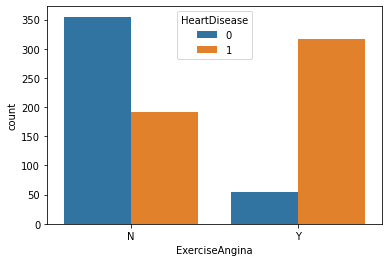

In [ ]:
sns.countplot(data=df,x="ExerciseAngina",hue="HeartDisease")
plt.show()

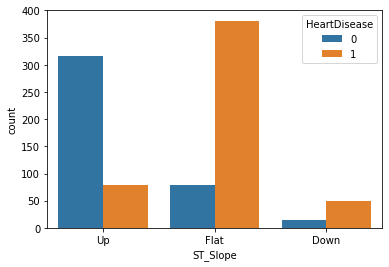

In [ ]:
sns.countplot(data=df,x="ST_Slope",hue="HeartDisease")
plt.show()

In [24]:
features=df.drop(["HeartDisease"],axis=1)
target=df["HeartDisease"]

In [25]:
features.shape

(918, 11)

In [26]:
target.shape

(918,)

In [35]:
#Data Encoding by Ordinal Encoder for categorical data
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
features[['Sex','ChestPain','RestinggECG','ExerciseAngina','ST_Slope']]=oe.fit_transform(features[['Sex','ChestPain','RestinggECG','ExerciseAngina','ST_Slope']])

In [36]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
normalize= MinMaxScaler()
standard= StandardScaler()
features['Oldpeak']= normalize.fit_transform(features[['Oldpeak']])
features['Age']= standard.fit_transform(features[['Age']])
features['RestingBP']= standard.fit_transform(features[['RestingBP']])
features['Cholesterol']= standard.fit_transform(features[['Cholesterol']])
features['MaxHR']= standard.fit_transform(features[['MaxHR']])
features.head()

,Age,Sex,ChestPain,RestingBP,Cholesterol,FastingBS,RestinggECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.433140,0.0,0.0,0.410909,0.825070,0,1.0,1.382928,0.0,0.295455,0.0
1,-0.478484,1.0,1.0,1.491752,-0.171961,0,0.0,0.754157,0.0,0.409091,1.0
2,-1.751359,0.0,0.0,-0.129513,0.770188,0,1.0,-1.525138,0.0,0.295455,0.0
3,-0.584556,1.0,2.0,0.302825,0.139040,0,0.0,-1.132156,1.0,0.465909,1.0
4,0.051881,0.0,1.0,0.951331,-0.034755,0,0.0,-0.581981,0.0,0.295455,0.0


In [37]:
features.head()

,Age,Sex,ChestPain,RestingBP,Cholesterol,FastingBS,RestinggECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.433140,0.0,0.0,0.410909,0.825070,0,1.0,1.382928,0.0,0.295455,0.0
1,-0.478484,1.0,1.0,1.491752,-0.171961,0,0.0,0.754157,0.0,0.409091,1.0
2,-1.751359,0.0,0.0,-0.129513,0.770188,0,1.0,-1.525138,0.0,0.295455,0.0
3,-0.584556,1.0,2.0,0.302825,0.139040,0,0.0,-1.132156,1.0,0.465909,1.0
4,0.051881,0.0,1.0,0.951331,-0.034755,0,0.0,-0.581981,0.0,0.295455,0.0


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [39]:
#Splitting training data and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,target,random_state=1,test_size=0.2)

In [40]:
# Function to calculate Cross Validation and ROC_AUC_Score
def model(classifier):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test,prediction)))
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    RocCurveDisplay.from_estimator(classifier, x_test, y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_evaluation(classifier):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

Accuracy :  90.76%
Cross Validation Score :  92.16%
ROC_AUC Score :  90.06%


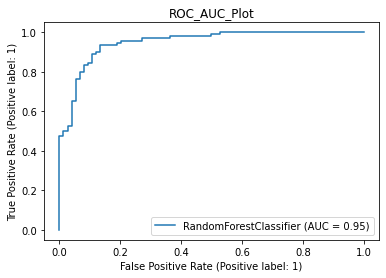

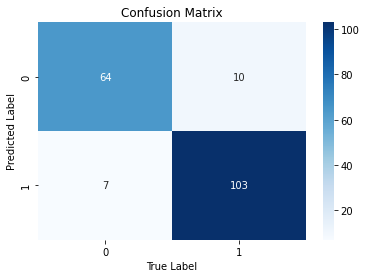

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        74
           1       0.91      0.94      0.92       110

    accuracy                           0.91       184
   macro avg       0.91      0.90      0.90       184
weighted avg       0.91      0.91      0.91       184



In [41]:
#Random Forest Classifer Machine Learning Model
from sklearn.ensemble import RandomForestClassifier
RFclassifier = RandomForestClassifier(max_depth = 4,random_state = 0)
model(RFclassifier)
model_evaluation(RFclassifier)

In [45]:
test_input = np.array([49,1,1,160,180,0,0,156,0,1,1])
print(test_input)
RFclassifier.predict(test_input.reshape(1, -1))

[ 49   1   1 160 180   0   0 156   0   1   1]


array([1])

In [44]:
#Saving the model
pickle.dump(RFclassifier, open('mlmodel.pkl','wb'))

files.download('mlmodel.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))
